In [11]:
# Modified code from https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

# Imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage import io, transform

Inherited from Dataset version of data loading described by tutorial.

In [12]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 1, 0))
        return {'image': torch.from_numpy(image),
                'label': torch.from_numpy(label)}

0 torch.Size([3, 490, 326]) torch.Size([1, 2])


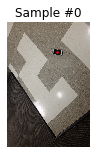

1 torch.Size([3, 490, 326]) torch.Size([1, 2])


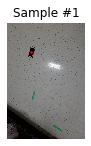

2 torch.Size([3, 490, 326]) torch.Size([1, 2])


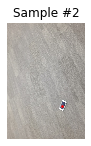

3 torch.Size([3, 490, 326]) torch.Size([1, 2])


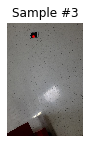

In [17]:
class DetectionImages(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels_df = pd.read_csv(csv_file, sep=" ", header=None)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.labels_df.iloc[idx, 0])
        image = io.imread(img_name)
        label = self.labels_df.iloc[idx, 1:]
        label = np.array([label])
        label = label.astype('float').reshape(-1, 2)
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
def show_label(image, label):
    """Show image with label for location of object"""
    image_np = image.numpy().transpose((1, 2, 0))
    plt.imshow(image_np)
    #plt.scatter(label[:, 0]*image_np.shape[1], label[:, 1]*image_np.shape[0], s=10, marker='.', c='r')
    plt.scatter(label[:, 1]*image_np.shape[1], label[:, 0]*image_np.shape[0], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

    
train_data = DetectionImages("../data/labels/train_labels.txt", "../data/train", transform=ToTensor())

for i in range(len(train_data)):
    sample = train_data[i]

    print(i, sample["image"].size(), sample["label"].size())
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_label(**sample)

    if i == 3:
        break
# dataloader = DataLoader(train_data, batch_size=4,
#                         shuffle=True, num_workers=0)

# # Helper function to show a batch
# def show_batch(sample_batched):
#     """Show image with label for a batch of samples."""
#     # Get the images and labels
#     images_batch, labels_batch = \
#             sample_batched['image'], sample_batched['label']
#     # Calculate the number of images in the batch
#     batch_size = len(images_batch)
#     im_size = images_batch.size(2)
#     grid_border_size = 2
#     # Calculate the number of y pixels
#     y_pixels_num = images_batch.numpy().shape[2]
#     # Calculate the number of x pixels
#     x_pixels_num = images_batch.numpy().shape[3]

#     # Change to numpy array to display with matplotlib
#     grid = utils.make_grid(images_batch)
#     plt.imshow(grid.numpy().transpose((1, 2, 0)))


#     for i in range(batch_size):
#         # Use a scatter plot to show the red dot for the location of the object.
#         # We multiply by number of pixels because values are normalized
#         plt.scatter(labels_batch[i, :, 0].numpy() * x_pixels_num + i * im_size + (i + 1) * grid_border_size,
#                     labels_batch[i, :, 1].numpy() * y_pixels_num + grid_border_size,
#                     s=10, marker='.', c='r')

#         plt.title('Batch from dataloader')

In [18]:
# for i_batch, sample_batched in enumerate(dataloader):
#     print(i_batch, sample_batched['image'].size(),
#           sample_batched['label'].size())

#     # observe 4th batch and stop.
#     if i_batch == 3:
#         plt.figure()
#         show_batch(sample_batched)
#         plt.axis('off')
#         plt.ioff()
#         plt.show()
#         break